In [8]:
# Andy Vo, ECGR 4106 Homework 0
# 01/23/2022

In [9]:
root_dir = "drive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [10]:
from torchvision import models

In [11]:
# A look at all of the models
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [12]:
# another neural network for running a pretrained
# version of it on another image
# AlexNet Architecture, instance of the class

alexnet = models.AlexNet()

In [13]:
# resnet101 function instantiate a 101-layer convolutional 
# neural network, creating an instance of the network

resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [14]:
# display details about the resnet101 structure (modules, one per line)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
# Preprocess the image
# Scale the input image to 256 x 256, 
# crop the image to 224 x 224 around the center
# transform it to a tensor and normalize RGB components

from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean= [0.485, 0.456, 0.406],
            std= [0.229, 0.224, 0.225]
        )])

In [28]:
# File directory of image in google docs
# "../Images/bobby.jpeg"
# "../Images/cat2.png"
# "../Images/mango.jpeg"
# "../Images/stopsign.jpeg"
# "../Images/candybar.jpeg"

from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework0/Images/candybar.jpeg")

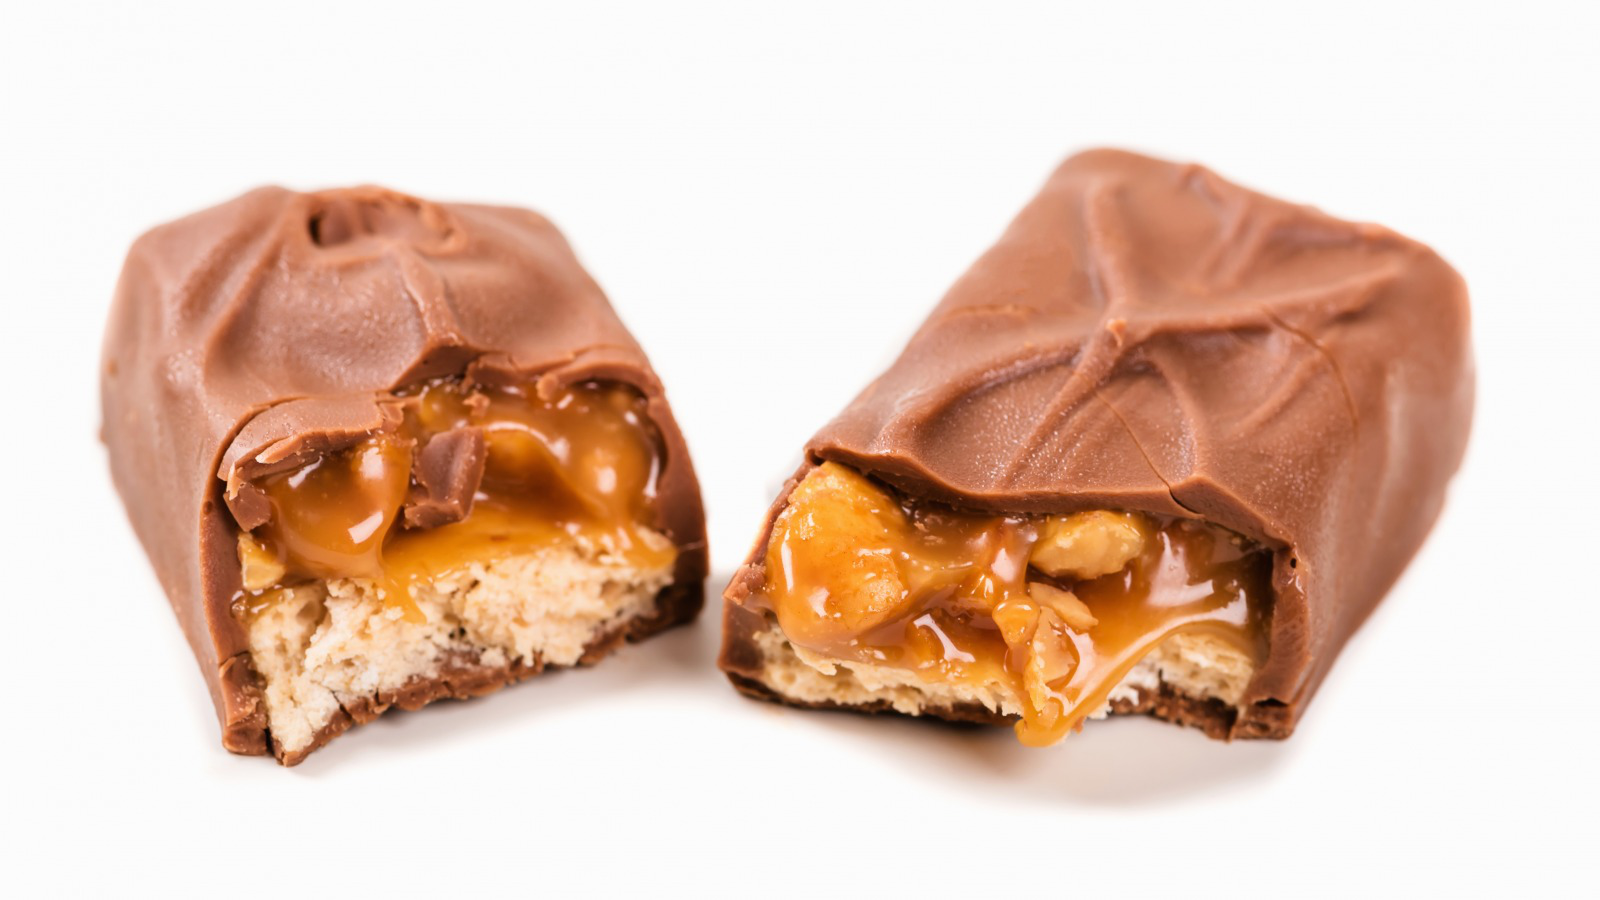

In [29]:
# Display the image
img

In [18]:
# Pass image through preproccessing pipeline

img_t = preprocess(img)

In [19]:
# Reshape, crop, and normalize the input tensor

import torch
batch_t = torch.unsqueeze(img_t,0)

In [20]:
# inference, running a trained model

resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
# inference
# operations involving 44.5 million parameters, 
# producing a vector of 1,000 scores, one per ImageNet class

out = resnet(batch_t)
out

tensor([[-5.8385e-01, -1.5474e+00, -2.5969e+00, -2.2805e+00, -3.9710e+00,
          2.0574e-01, -1.4168e+00, -1.9897e+00, -9.3359e-01, -2.3813e+00,
         -1.0883e+00, -2.5327e+00, -1.6758e+00, -2.1744e+00, -4.1119e+00,
         -2.0569e+00, -1.6448e+00, -2.7908e+00, -5.5852e+00, -1.5271e+00,
         -3.3933e+00, -3.1360e+00, -1.3765e+00, -1.6360e+00, -2.9304e+00,
         -3.2381e-01, -1.8048e+00, -8.3329e-01,  1.1842e+00, -2.3375e+00,
         -1.4513e+00,  3.3707e-01,  1.2262e-01, -1.2666e+00, -2.8353e+00,
         -3.9512e-01,  1.1604e+00,  2.1395e+00,  4.7985e-01, -1.6815e+00,
         -2.5114e+00, -7.5320e-01, -1.0894e+00,  7.6049e-01, -6.2177e-01,
         -2.4284e-01, -2.7018e+00, -2.1067e+00, -4.9897e+00, -7.8296e-01,
         -1.4771e+00,  3.5848e+00, -1.1815e+00, -3.3656e-01, -2.2439e+00,
         -3.1678e+00, -1.1928e+00, -1.7905e+00, -2.2376e+00, -1.8420e+00,
         -8.5753e-01, -1.8158e-01, -1.3414e-01,  1.1664e+00, -2.0095e+00,
         -4.1718e+00, -4.7156e-01, -2.

In [22]:
# Load the 1000 labels for the ImageNet dataset classes

with open("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework0/Text_Files/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [23]:
# Determine the index corresponding to the maximum score
# Using the max function in PyTorch

_, index = torch.max(out, 1)

In [24]:
# Accessing the label
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('chocolate sauce, chocolate syrup', 23.07089614868164)

In [25]:
# Sort values in ascending order or descending order and also 
# provide the indices of the sorted values in the original way

_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


# ****************** End of Question 1 Code ************************ #

[('chocolate sauce, chocolate syrup', 23.07089614868164),
 ('pretzel', 20.100658416748047),
 ('bakery, bakeshop, bakehouse', 14.791742324829102),
 ('ice cream, icecream', 7.526828289031982),
 ('bagel, beigel', 3.4752492904663086)]

In [ ]:
# ***************** Begin Question 2 ****************************** #


